<a href="https://colab.research.google.com/github/maimonahST/Data-Science/blob/main/DS_Project(v1.0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Population of Saudi Arabia**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import

import pandas as pd
import numpy as np

In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import shap

In [ ]:
! pip install eli5
import eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=07be898971a1d95d45face6dc1fbf07746af774774d3cfe78f065e7a5737f768
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# load the dataset

df = pd.read_csv('/content/drive/MyDrive/DS/Population estimates by gender nationality and region 2010 - 2022_data.csv')
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,Madinah,"2,014",Female,Saudi,"562,344"
1,Tabouk,"2,010",Female,Saudi,"239,792"
2,Hail,"2,013",Female,Saudi,"211,727"
3,Eastern Region,"2,016",Male,Saudi,"1,308,467"
4,Al-Baha,"2,018",Female,Non-Saudi,"16,951"


In [ ]:
df.tail()

,Region,Year,Gender,Nationality,Population estimates
671,Makkah,"2,015",Male,Saudi,"1,756,374"
672,Al-Baha,"2,015",Male,Saudi,"104,524"
673,Madinah,"2,021",Male,Saudi,"658,453"
674,Tabouk,"2,020",Female,Non-Saudi,"44,416"
675,Makkah,"2,015",Female,Saudi,"1,753,158"


# Preprocessing

In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    object
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    object
dtypes: object(5)
memory usage: 26.5+ KB


### Convert the features of type "object" to numeric

In [ ]:
# Remove non-numeric characters from the 'Year' and 'Population estimates' columns
df['Year'] = df['Year'].str.replace(',', '')
df['Population estimates'] = df['Population estimates'].str.replace(',', '')

# Convert the 'Year'and 'Population estimates' columns to int64
df['Year'] = df['Year'].astype('int64')
df['Population estimates'] = df['Population estimates'].astype('int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    int64 
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.5+ KB


In [ ]:
# encode categorical col
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

df.info()

Label Mapping:
{'Al-Baha': 0, 'Al-Jouf': 1, 'Aseer': 2, 'Eastern Region': 3, 'Hail': 4, 'Jazan': 5, 'Madinah': 6, 'Makkah': 7, 'Najran': 8, 'Northern Region': 9, 'Qaseem': 10, 'Riyadh': 11, 'Tabouk': 12}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    int64 
 1   Year                  676 non-null    int64 
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 26.5+ KB


In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

df.info()

Label Mapping:
{'Female': 0, 'Male': 1}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    int64 
 1   Year                  676 non-null    int64 
 2   Gender                676 non-null    int64 
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 26.5+ KB


In [ ]:
df['Nationality'] = le.fit_transform(df['Nationality'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

df.info()

Label Mapping:
{'Non-Saudi': 0, 'Saudi': 1}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Region                676 non-null    int64
 1   Year                  676 non-null    int64
 2   Gender                676 non-null    int64
 3   Nationality           676 non-null    int64
 4   Population estimates  676 non-null    int64
dtypes: int64(5)
memory usage: 26.5 KB


In [ ]:
df['Year'] = df['Year'].apply(lambda v: (v-df['Year'].min())/(df['Year'].max()-df['Year'].min()))
df['Population estimates'] = df['Population estimates'].apply(lambda v: (v-df['Population estimates'].min())/(df['Population estimates'].max()-df['Population estimates'].min()))

# Statistical Analysis

In [ ]:
# describe the dataset
df.describe()

,Region,Year,Gender,Nationality,Population estimates
count,676.000000,676.000000,676.00000,676.00000,676.000000
mean,6.000000,0.500000,0.50000,0.50000,0.160500
std,3.744428,0.312036,0.50037,0.50037,0.208218
min,0.000000,0.000000,0.00000,0.00000,0.000000
25%,3.000000,0.250000,0.00000,0.00000,0.028182
50%,6.000000,0.500000,0.50000,0.50000,0.069356
75%,9.000000,0.750000,1.00000,1.00000,0.178000
max,12.000000,1.000000,1.00000,1.00000,1.000000


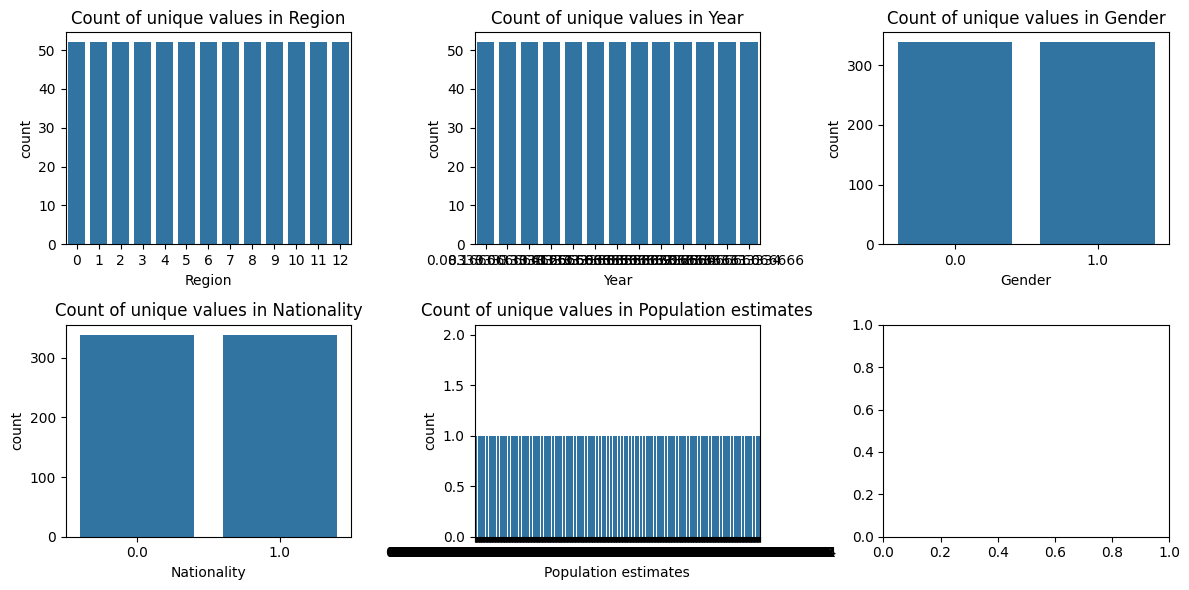

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Plot count of unique values for each column
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f'Count of unique values in {col}')

plt.tight_layout()
plt.show()


### Interquartile range (IQR)

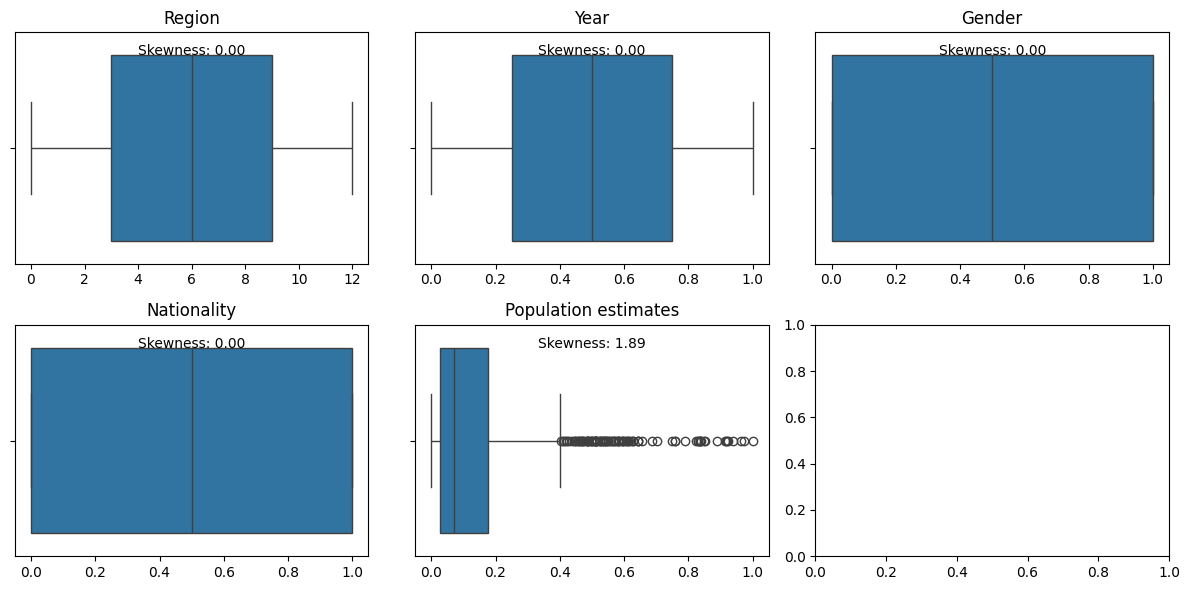

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Plot box plots for each column
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]

    # Create a box plot for the feature
    sns.boxplot(x=df[col], ax=ax)

    # Add skewness value as text on the plot
    skewness_value = df[col].skew(axis=0, skipna=True)
    ax.text(0.5, 0.9, f'Skewness: {skewness_value:.2f}', transform=ax.transAxes, ha='center')

    ax.set_title(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()



### Measures of shape (Skewness)

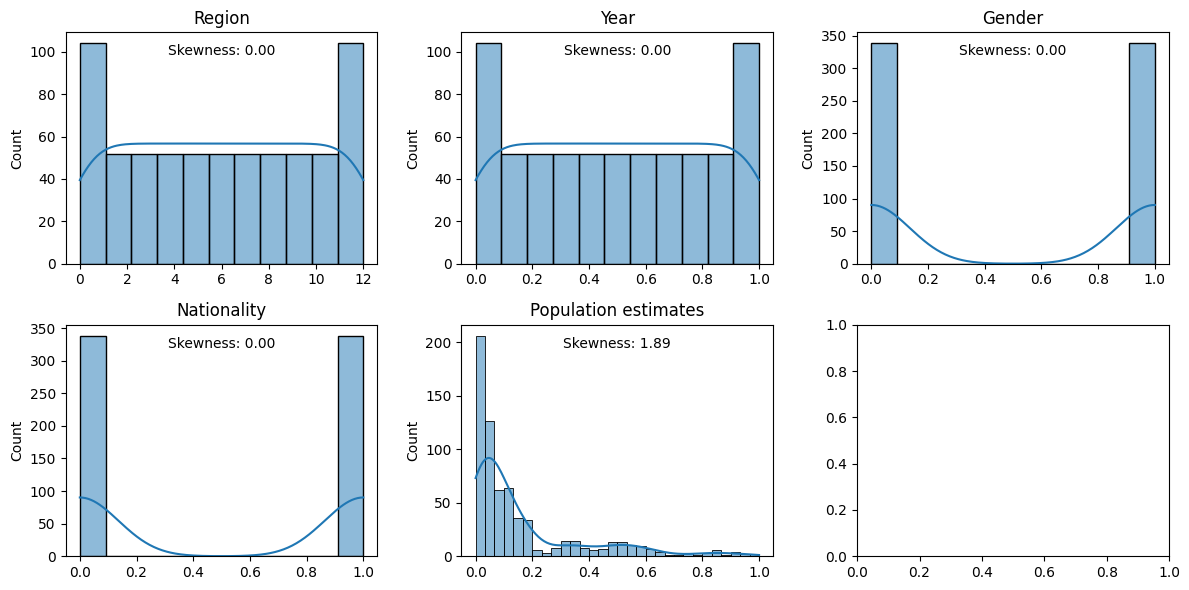

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Plot distribution and skewness for each column
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]

    # Create a histogram for the feature
    sns.histplot(df[col], kde=True, ax=ax)

    # Add skewness value as text on the plot
    skewness_value = df[col].skew(axis=0, skipna=True)
    ax.text(0.5, 0.9, f'Skewness: {skewness_value:.2f}', transform=ax.transAxes, ha='center')

    ax.set_title(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


### Correlation matrix

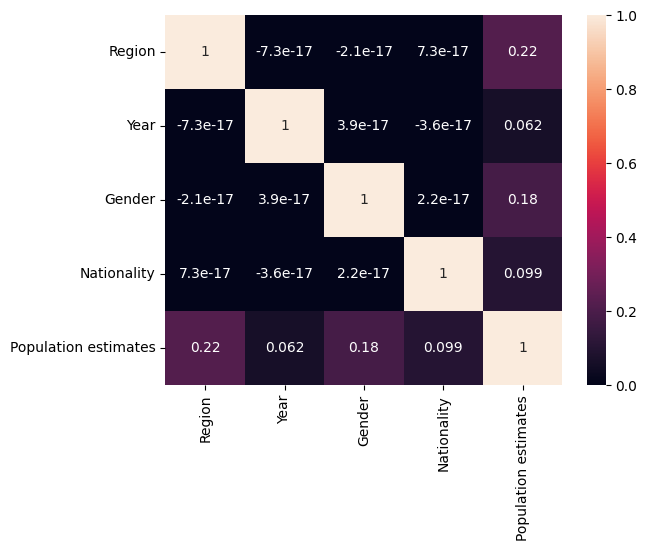

In [ ]:
# correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()


# Split the dataset

In [5]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Population estimates', axis=1)
y = df['Population estimates']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (540, 4)
y_train shape: (540,)
X_test shape: (136, 4)
y_test shape: (136,)


In [6]:
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,6,0.333333,0.0,1.0,0.161569
1,12,0.000000,0.0,1.0,0.066477
2,4,0.250000,0.0,1.0,0.058203
3,3,0.500000,1.0,1.0,0.381536
4,0,0.666667,0.0,0.0,0.000780


In [ ]:
# prompt: save my csv file after preprocessing

df.to_csv('/content/drive/MyDrive/DS/preprocessed_data.csv')


# Build and train ML models

*   R2 = 1: Perfect prediction.
*   R2 = 0: The model doesn't explain any variability in the target variable.
*   R2 < 0: The model performs worse than a simple mean model.

In [7]:
feat_names = list(X_train.columns)
feat_names

['Region', 'Year', 'Gender', 'Nationality']

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("preprocessed_data (1).csv", index_col=0)
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,6,0.333333,0.0,1.0,0.161569
1,12,0.000000,0.0,1.0,0.066477
2,4,0.250000,0.0,1.0,0.058203
3,3,0.500000,1.0,1.0,0.381536
4,0,0.666667,0.0,0.0,0.000780


## SVR Model

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the SVR model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model using coefficient of determination (R^2) and mean squared error
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Print the model performance
print("Random Forest Model Performance:")
print(f"Coefficient of Determination (R^2): {r2_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")

Random Forest Model Performance:
Coefficient of Determination (R^2): 0.07
Mean Squared Error (MSE): 0.04
Mean Absolute Error (MAE): 0.13


#### Hyper-parameters grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the hyperparameter grid
param_grid = {
    'C': [10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Print the best model and its performance
print("Best Model:")
print(best_model)
print(f"Best Score: {best_score:.2f}")

Best Model:
SVR(C=100, gamma=0.1)
Best Score: 0.72


In [ ]:
# Evaluate the predictions
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set using the best model
y_pred_svr = best_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Print the evaluation metrics
print("SVR Evaluation Metrics:")
print(f"R-squared (R2) Score: {r2_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")

SVR Evaluation Metrics:
R-squared (R2) Score: 0.76
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.08


In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.svm import SVR


# Build the model
best_model = SVR(C=100, gamma=0.1)

best_model.fit(X_train, y_train)

# Evaluate the predictions
# Make predictions on the test set using the best model
y_pred_svr = best_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Print the evaluation metrics
print("SVR Evaluation Metrics:")
print(f"R-squared (R2) Score: {r2_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")



SVR Evaluation Metrics:
R-squared (R2) Score: 0.76
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.08


### Actual vs predicted values

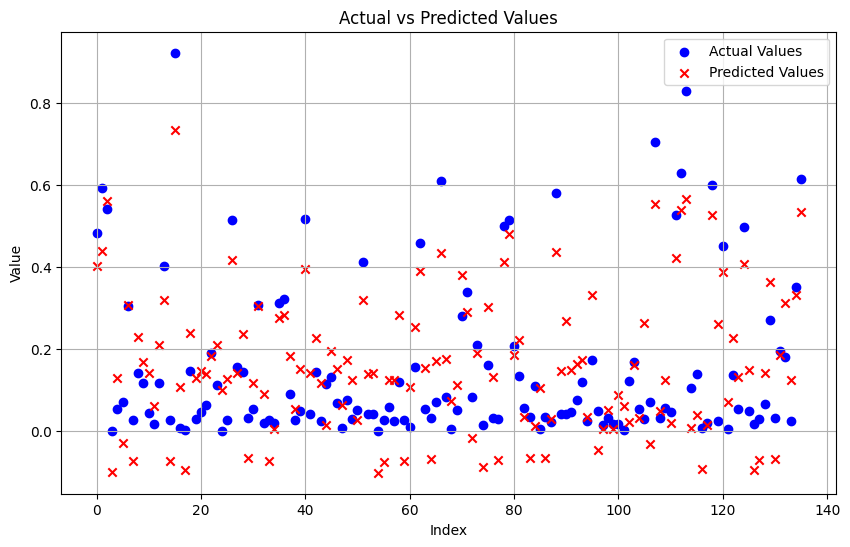

In [19]:
import matplotlib.pyplot as plt


# Plot the actual vs predicted values in one figure
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred_svr)), y_pred_svr, color='red', label='Predicted Values', marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

### XAI

In [ ]:
explainer = shap.KernelExplainer(best_model.predict , X_train)
shap_values = explainer.shap_values(X_train)

  0%|          | 0/540 [00:00<?, ?it/s]

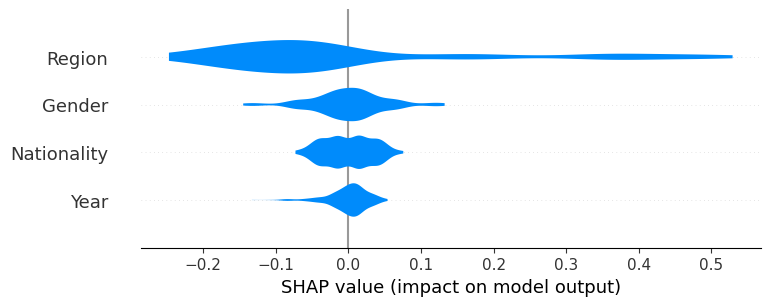

In [ ]:
# violin summary plot
shap.plots.violin(shap_values, feature_names=feat_names)

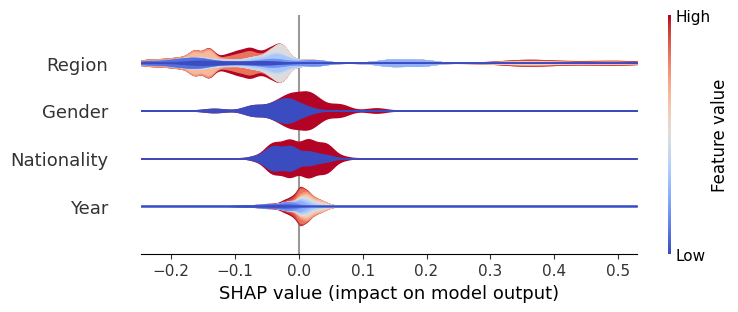

In [ ]:
# violin summary plot
shap.plots.violin(
    shap_values, features=X_train, feature_names=feat_names, plot_type="layered_violin"
)

In [ ]:
eli5.show_weights(best_model, feature_names = feat_names )

## Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using coefficient of determination (R^2) and mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the model performance
print("Random Forest Model Performance:")
print(f"Coefficient of Determination (R^2): {r2_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

Random Forest Model Performance:
Coefficient of Determination (R^2): 1.00
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01


#### hyperparameter grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)

# Fit the grid search object to the data
grid_search_rf.fit(X_train, y_train)

# Get the best model and its performance
best_model_rf = grid_search_rf.best_estimator_
best_score_rf = grid_search_rf.best_score_

# Print the best model and its performance
print("Best Random Forest Model:")
print(best_model_rf)
print(f"Best Score: {best_score_rf:.2f}")

Best Random Forest Model:
RandomForestRegressor()
Best Score: 0.99


In [ ]:
# Make predictions on the test set using the best Random Forest model
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate the Random Forest model using mean squared error and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest
print("Random Forest Evaluation Metrics:")
print(f"R-squared (R2) Score: {r2_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")


Random Forest Evaluation Metrics:
R-squared (R2) Score: 1.00
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using coefficient of determination (R^2) and mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the model performance
print("Random Forest Model Performance:")
print(f"Coefficient of Determination (R^2): {r2_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

Random Forest Model Performance:
Coefficient of Determination (R^2): 1.00
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01


### Actual vs predicted values

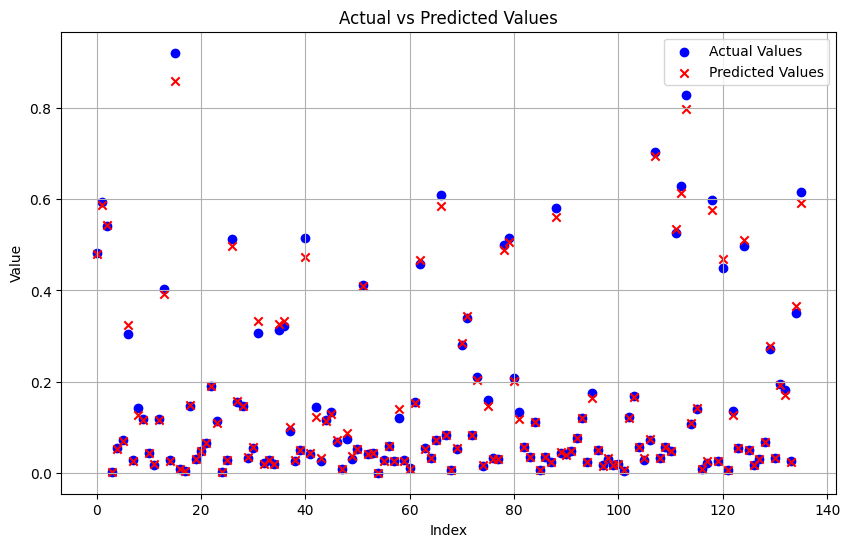

In [25]:
import matplotlib.pyplot as plt


# Plot the actual vs predicted values in one figure
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='red', label='Predicted Values', marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

### XAI

In [ ]:
explainer = shap.TreeExplainer(best_model_rf)
shap_values = explainer.shap_values(X_train)

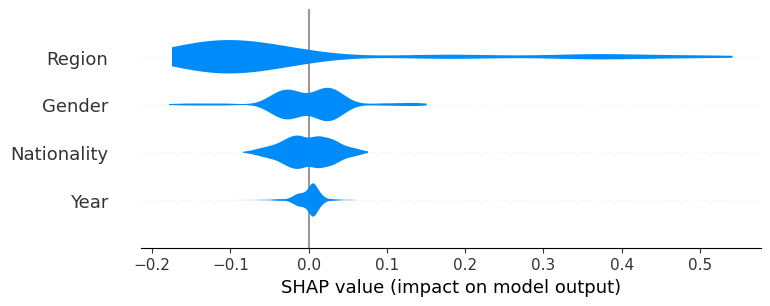

In [ ]:
# violin summary plot
shap.plots.violin(shap_values, feature_names=feat_names)

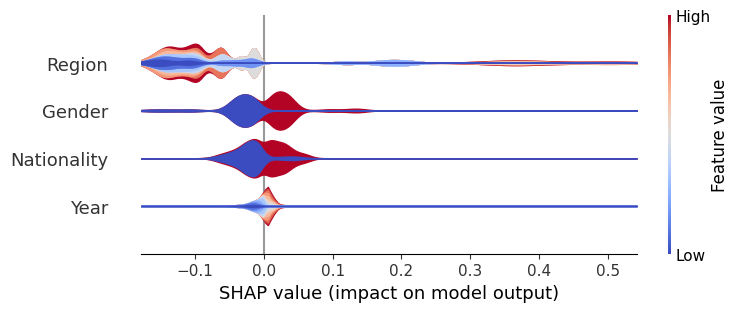

In [ ]:
# violin summary plot
shap.plots.violin(
    shap_values, features=X_train, feature_names=feat_names, plot_type="layered_violin"
)

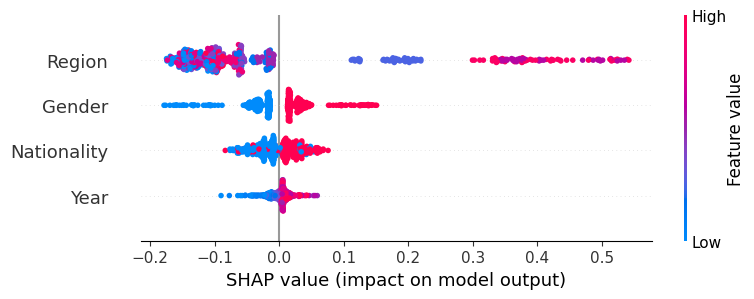

In [ ]:
# summary plot

shap.initjs()
shap.summary_plot(shap_values, X_train)

In [ ]:
eli5.show_weights(best_model_rf, feature_names = feat_names )

Weight,Feature
0.8135 ± 0.0445,Region
0.0884 ± 0.0381,Gender
0.0812 ± 0.0189,Nationality
0.0168 ± 0.0064,Year


## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define the Decision Tree model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model using coefficient of determination (R^2) and mean squared error
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print the model performance
print("Decision Tree Model Performance:")
print(f"Coefficient of Determination (R^2): {r2_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")

Decision Tree Model Performance:
Coefficient of Determination (R^2): 1.00
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01


#### Hyper-parameters grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5)

# Fit the grid search object to the data
grid_search_dt.fit(X_train, y_train)

# Get the best model and its performance
best_model_dt = grid_search_dt.best_estimator_
best_score_dt = grid_search_dt.best_score_

# Print the best model and its performance
print("Best Decision Tree Model:")
print(best_model_dt)
print(f"Best Score: {best_score_dt:.2f}")

Best Decision Tree Model:
DecisionTreeRegressor(max_depth=20)
Best Score: 0.99


In [ ]:
# Make predictions on the test set using the best Decision Tree model
y_pred_dt = best_model_dt.predict(X_test)

# Evaluate the Decision Tree model using mean squared error and R-squared
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print the evaluation metrics for Decision Tree
print("Decision Tree Evaluation Metrics:")
print(f"R-squared (R2) Score: {r2_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")

Decision Tree Evaluation Metrics:
R-squared (R2) Score: 1.00
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01


In [28]:
from sklearn.tree import DecisionTreeRegressor

# Define the Decision Tree model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model using coefficient of determination (R^2) and mean squared error
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print the model performance
print("Decision Tree Model Performance:")
print(f"Coefficient of Determination (R^2): {r2_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")

Decision Tree Model Performance:
Coefficient of Determination (R^2): 1.00
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01


### Actual vs predicted values

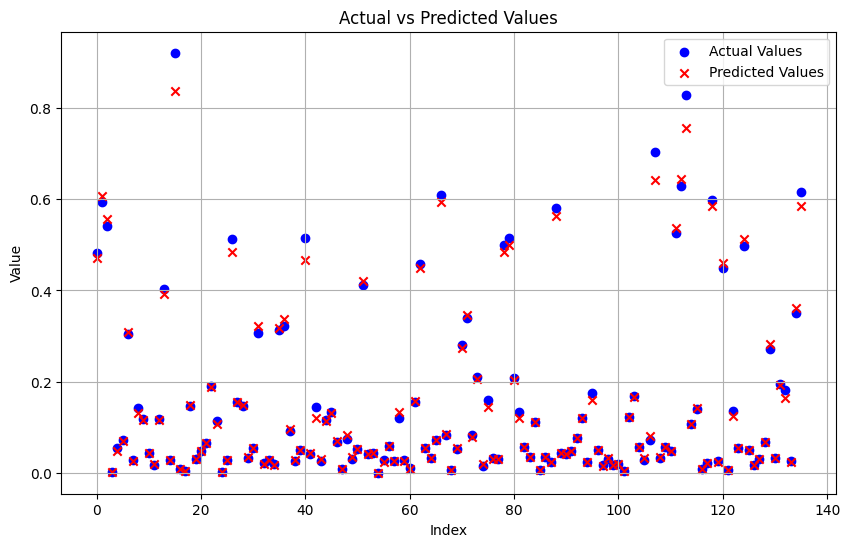

In [29]:
import matplotlib.pyplot as plt


# Plot the actual vs predicted values in one figure
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred_dt)), y_pred_dt, color='red', label='Predicted Values', marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

### XAI


In [ ]:
explainer = shap.TreeExplainer(best_model_dt)
shap_values = explainer.shap_values(X_train)

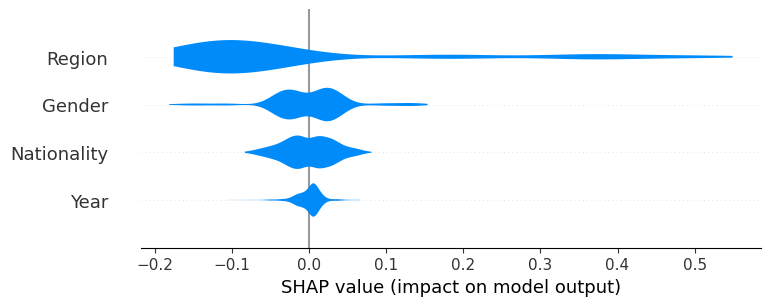

In [ ]:
shap.plots.violin(shap_values, feature_names=feat_names)

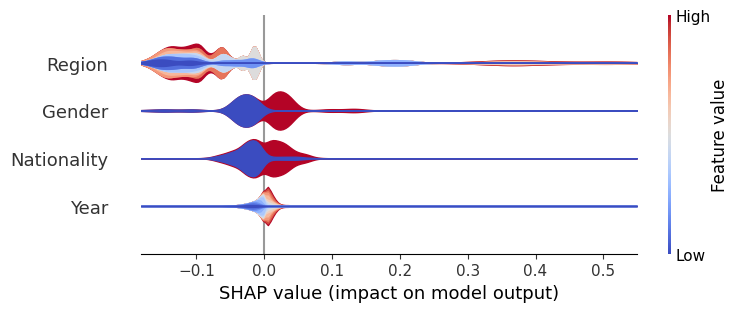

In [ ]:
shap.plots.violin(
    shap_values, features=X_train, feature_names=feat_names, plot_type="layered_violin"
)

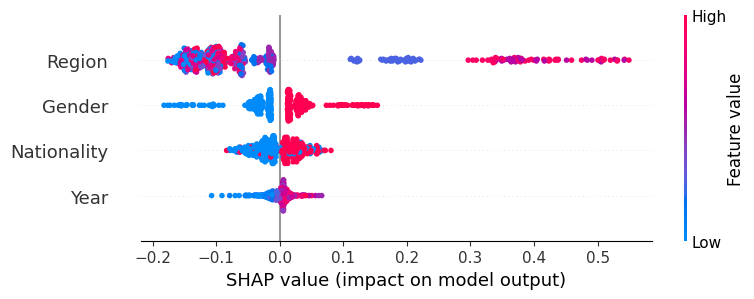

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_train)

In [ ]:
! pip install imgkit

In [ ]:
!apt-get install wkhtmltopdf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas iio-sensor-proxy libavahi-core7 libavahi-glib1
  libdaemon0 libevdev2 libfontenc1 libgudev-1.0-0 libhyphen0 libinput-bin libinput10
  libjson-glib-1.0-0 libjson-glib-1.0-common liblmdb0 libmaxminddb0 libmbim-glib4 libmbim-proxy
  libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200 libnotify4 libnss-mdns libproxy1v5 libqmi-glib5
  libqmi-proxy libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5
  libqt5printsupport5 libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 libsoup2.4-1 libsoup2.4-common libudev1
  libwacom-bin libwacom-common libwacom9 libwoff1 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libx

In [ ]:
import imgkit
import eli5

# Get the explanation of the model
explanation = eli5.show_weights(best_model_dt)

# Save the explanation as an image
imgkit.from_string(explanation.data, 'eli5_explanation.png', options={'format': 'png'})


QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [ ]:
# visualise the weights associated to each feature
eli5.show_weights(best_model_dt, feature_names = feat_names )

Weight,Feature
0.8035,Region
0.0938,Gender
0.0852,Nationality
0.0176,Year


## Adaboost Model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the AdaBoost model
adaboost_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, learning_rate=1.0)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the AdaBoost model using mean squared error and R-squared
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)

# Print the model performance
print("AdaBoost Model Performance:")
print(f"Coefficient of Determination (R^2): {r2_adaboost:.2f}")
print(f"Mean Squared Error (MSE): {mse_adaboost:.2f}")
print(f"Mean Absolute Error (MAE): {mae_adaboost:.2f}")

AdaBoost Model Performance:
Coefficient of Determination (R^2): 0.99
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01


#### Hyper-parameters grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameter grid for AdaBoost
param_grid_adaboost = {
    'estimator': [DecisionTreeRegressor(max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
                   for depth in [None, 10, 20]
                   for split in [2, 5, 10]
                   for leaf in [1, 2, 4]],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the GridSearchCV object for AdaBoost
grid_search_adaboost = GridSearchCV(AdaBoostRegressor(), param_grid_adaboost, cv=5)

# Fit the grid search object to the data
grid_search_adaboost.fit(X_train, y_train)

# Get the best model and its performance
best_model_adaboost = grid_search_adaboost.best_estimator_
best_score_adaboost = grid_search_adaboost.best_score_

# Print the best model and its performance
print("Best AdaBoost Model:")
print(best_model_adaboost)
print(f"Best Score: {best_score_adaboost:.2f}")

Best AdaBoost Model:
AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=0.01, n_estimators=200)
Best Score: 0.99


In [ ]:
# Make predictions on the test set using the best AdaBoost model
y_pred_adaboost = best_model_adaboost.predict(X_test)

# Evaluate the AdaBoost model using mean squared error and R-squared
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)

# Print the evaluation metrics for AdaBoost
print("AdaBoost Evaluation Metrics:")
print(f"R-squared (R2) Score: {r2_adaboost:.2f}")
print(f"Mean Squared Error (MSE): {mse_adaboost:.2f}")
print(f"Mean Absolute Error (MAE): {mae_adaboost:.2f}")

AdaBoost Evaluation Metrics:
R-squared (R2) Score: 1.00
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01


In [26]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the AdaBoost model
adaboost_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=0.01, n_estimators=200)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the AdaBoost model using mean squared error and R-squared
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)

# Print the model performance
print("AdaBoost Model Performance:")
print(f"Coefficient of Determination (R^2): {r2_adaboost:.2f}")
print(f"Mean Squared Error (MSE): {mse_adaboost:.2f}")
print(f"Mean Absolute Error (MAE): {mae_adaboost:.2f}")

AdaBoost Model Performance:
Coefficient of Determination (R^2): 1.00
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01


### Actual vs predicted values

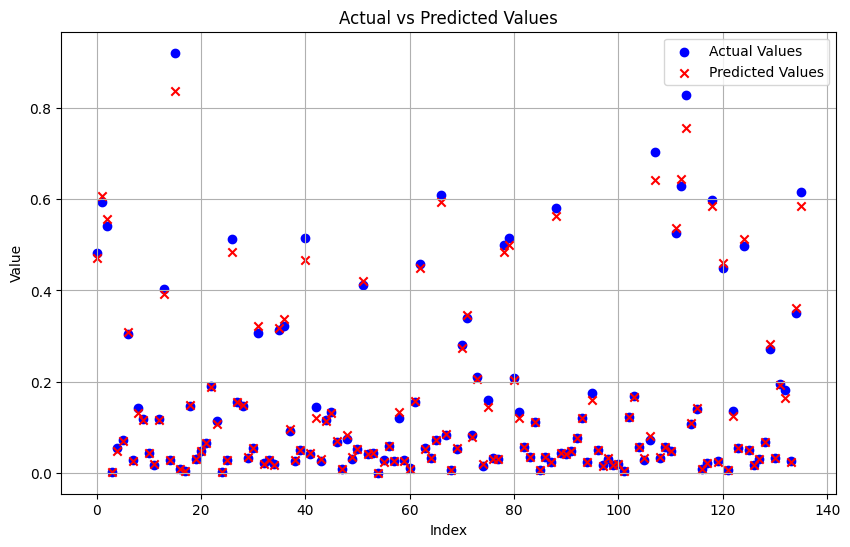

In [27]:
import matplotlib.pyplot as plt


# Plot the actual vs predicted values in one figure
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred_adaboost)), y_pred_adaboost, color='red', label='Predicted Values', marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

### XAI

In [ ]:
eli5.show_weights(best_model_adaboost, feature_names = feat_names )

Weight,Feature
0.7091 ± 0.2711,Region
0.1536 ± 0.2065,Gender
0.0827 ± 0.1132,Nationality
0.0546 ± 0.1151,Year


Calculate chap values for adaboost is not available